### Glass Identification

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<b>The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence.if it is correctly identified.</b>

In [85]:
#read the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [86]:
#read the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",header = None)
df


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Here specific column names are not present in the dataframe, so we need to add column names.

This dataset contains data like 'Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass type'.  

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass (1 to 7 types)

Here The <b>Glass type is the target variable</b> and the remaining columns are considered as features. This dataset contains 214 rows and 11 columns


In [87]:
df.columns = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass type']
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


This dataset contains both continous and categorical data, in which our target variable 'Glass Type' has categories from 1 to 7. So, this problem is considered as Classification problem.

In [88]:
df.shape

(214, 11)

In [89]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [90]:
df.tail()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Id column is having 214 numbers from 1 to 214 and also it is not useful for predicting the glass type so we will drop the ID number column

In [91]:
df.drop('Id number', axis = 1, inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   Glass type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


We see that there are 214 rows and 10 columns in which 9 columns are float values and 1 column is integer value, and there are no null values. 

In [93]:
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass type    0
dtype: int64

There are no null values. Next we will count the values in each column.

In [94]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass type, dtype: int64


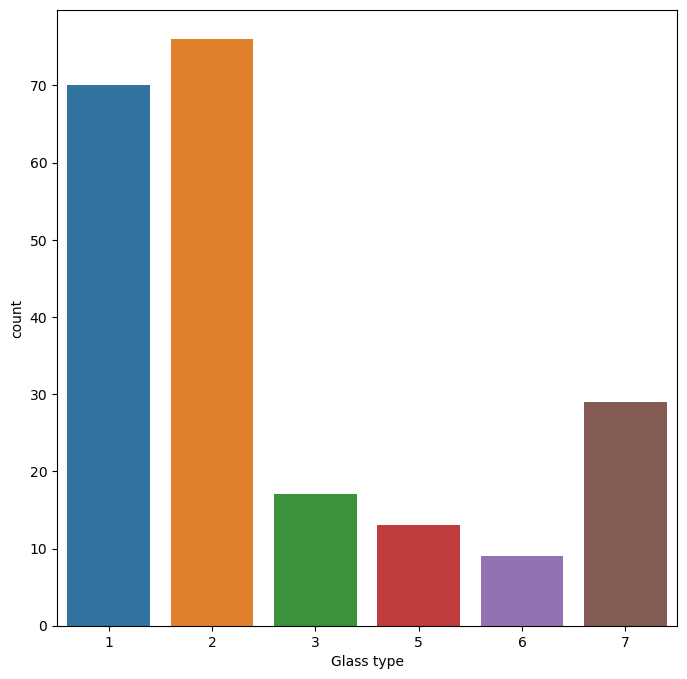

In [95]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['Glass type'])
print(df['Glass type'].value_counts())
plt.show()

we see most of the glass are from type 1 and 2 and there are no glasses of type 4, the least data is available from glass type 6. 

Next, since we have multiple categories we will convert it to binary category considering values 1 to 4 as 0 and 5 to 7 as 1.

In [96]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [97]:
df['Glass type'] = df['Glass type'].apply(lambda x:1 if x>=5 else 0)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


we see that the categories 1 to 7 are converted to 0 and 1 only. next we will see the value counts and also plot the graph for Glass type.

0    163
1     51
Name: Glass type, dtype: int64


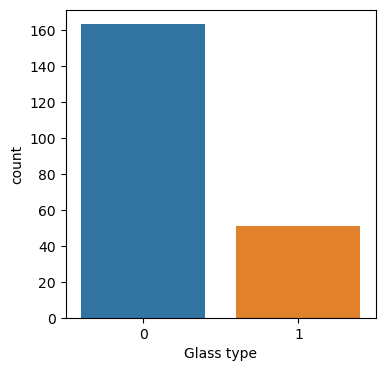

In [98]:
plt.figure(figsize = (4,4))
sns.countplot(df['Glass type'])
print(df['Glass type'].value_counts())

we see there is huge data for 0 Glass type than 1 Glass type, so we need to balance the data for both Glass type.

In [99]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


we see that 
1. all counts are same means there is no null values.
2. mean and standard deviations are normal that means data is better.
3. There is some slight skewness in all columns.
4. There are outliers in Na, K, Ca, Ba

#### Data Visualization

<AxesSubplot:xlabel='RI', ylabel='Density'>

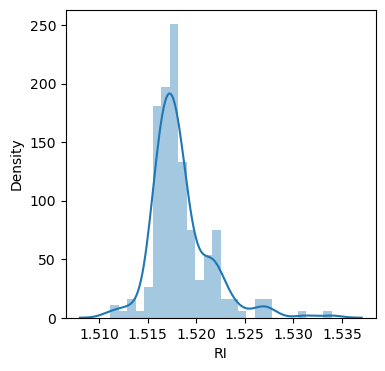

In [100]:
plt.figure(figsize = (4,4))
sns.distplot(df['RI'])

We observe that majority of the data lie between 1.517 to 1.518. From values 1.530 to 1.535 there is very less data.

<AxesSubplot:xlabel='Na', ylabel='Density'>

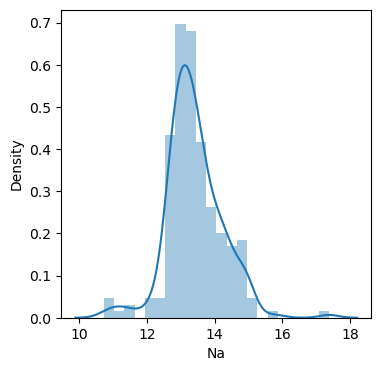

In [101]:
plt.figure(figsize = (4,4))
sns.distplot(df['Na'])

We observe that most of the data lie between 12.5 to 13. There are no much values from 16 to 17.

<AxesSubplot:xlabel='Mg', ylabel='Density'>

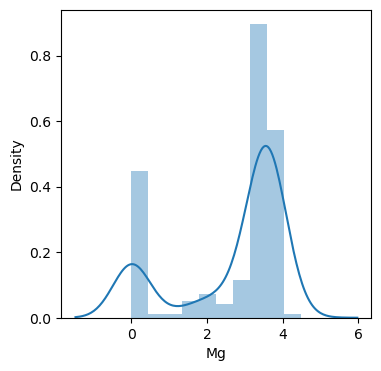

In [102]:
plt.figure(figsize = (4,4))
sns.distplot(df['Mg'])

We see bidominal graph and also there is no such skewness.

<AxesSubplot:xlabel='Al', ylabel='Density'>

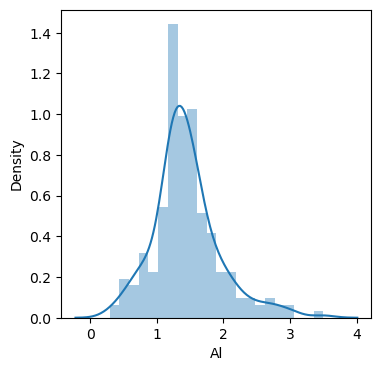

In [103]:
plt.figure(figsize = (4,4))
sns.distplot(df['Al'])

We see that there is huge value of data from 1.2 to 1.6 and there may be light skewness.

<AxesSubplot:xlabel='Si', ylabel='Density'>

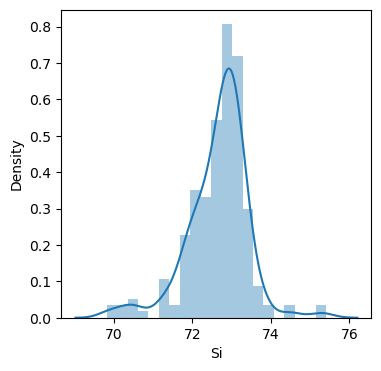

In [104]:
plt.figure(figsize = (4,4))
sns.distplot(df['Si'])

There is huge data ranging from 72.5 to 73.5 and also some skewness from 75.

<AxesSubplot:xlabel='K', ylabel='Density'>

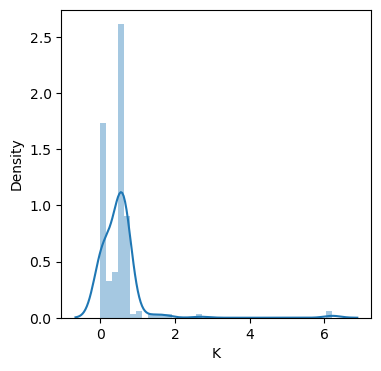

In [105]:
plt.figure(figsize = (4,4))
sns.distplot(df['K'])

Here we see most of the values ranging between 0 and 1.5 and there is huge skewness.

<AxesSubplot:xlabel='Ca', ylabel='Density'>

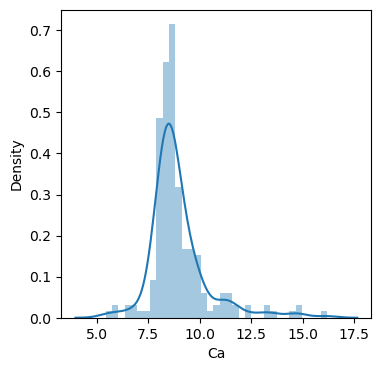

In [106]:
plt.figure(figsize = (4,4))
sns.distplot(df['Ca'])

Here we see that there is huge data ranging between 7.6 to 9 and also there is skewness in this column.

<AxesSubplot:xlabel='Ba', ylabel='Density'>

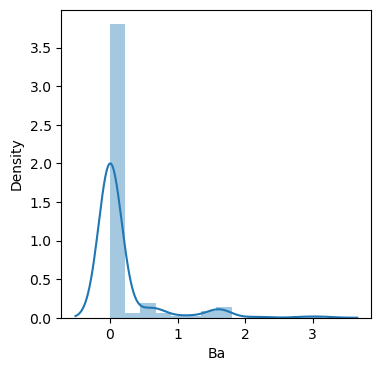

In [107]:
plt.figure(figsize = (4,4))
sns.distplot(df['Ba'])

We see that there is huge values between 0 to 0.2 and there is skewness 

<AxesSubplot:xlabel='Fe', ylabel='Density'>

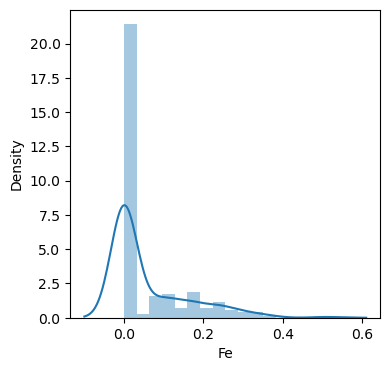

In [108]:
plt.figure(figsize = (4,4))
sns.distplot(df['Fe'])

We see that there are values between 0.0 to 0.05 and skewness from 0.4.

Next we will check for the correlation among the features as well as features and target.

In [109]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Glass type,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


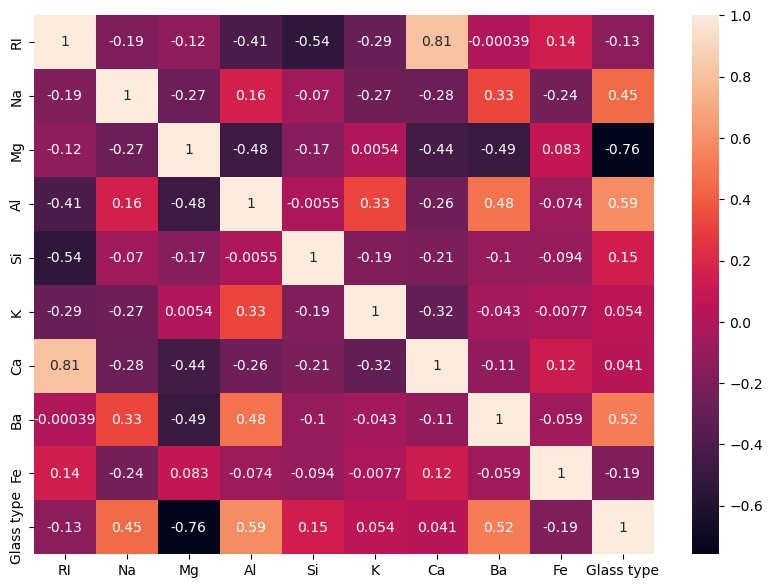

In [110]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot=True,annot_kws ={'size':10})
plt.show()

We see that 
1. Among features:  Ri is highly corelated with Ca compared to all other features. There is no such correlation among features
2. Features with target: AI, Ba and Na are correlated with target Glass type but there is no such high correlation between target and features 
    

In [111]:
df.corr()['Glass type']

RI           -0.134327
Na            0.452336
Mg           -0.758289
Al            0.585928
Si            0.148072
K             0.053774
Ca            0.040670
Ba            0.523403
Fe           -0.194903
Glass type    1.000000
Name: Glass type, dtype: float64

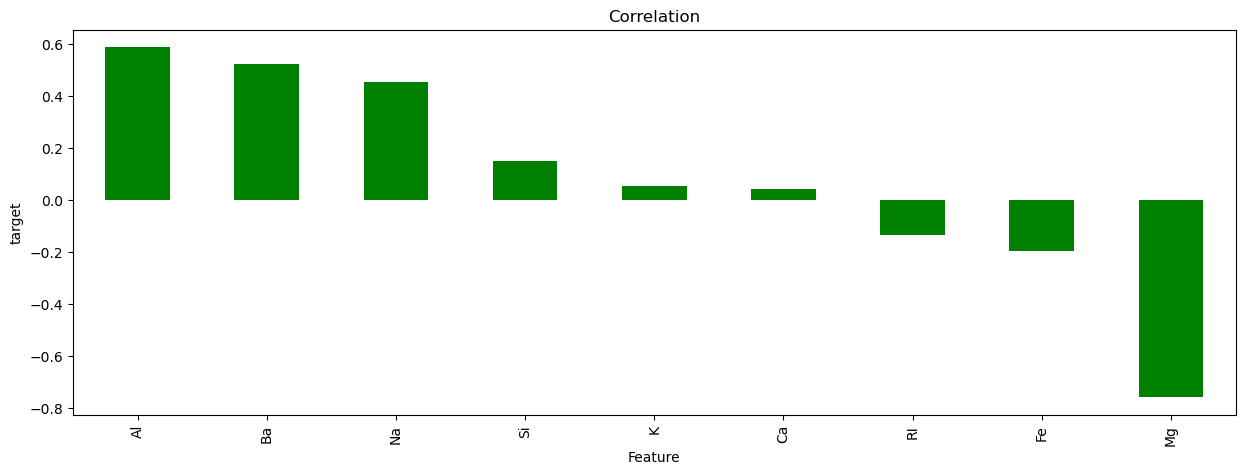

In [112]:
plt.figure(figsize=(15,5))
df.corr()['Glass type'].sort_values(ascending=False).drop(['Glass type']).plot(kind='bar',color='green')
plt.title('Correlation')
plt.xlabel('Feature')
plt.ylabel('target')
plt.show()

We see that AI is highly and positively correlated with target and Mg is negatively correlated wit target, We also see that K and Ca are having very least correlation with target.

In [113]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass type'], dtype='object')

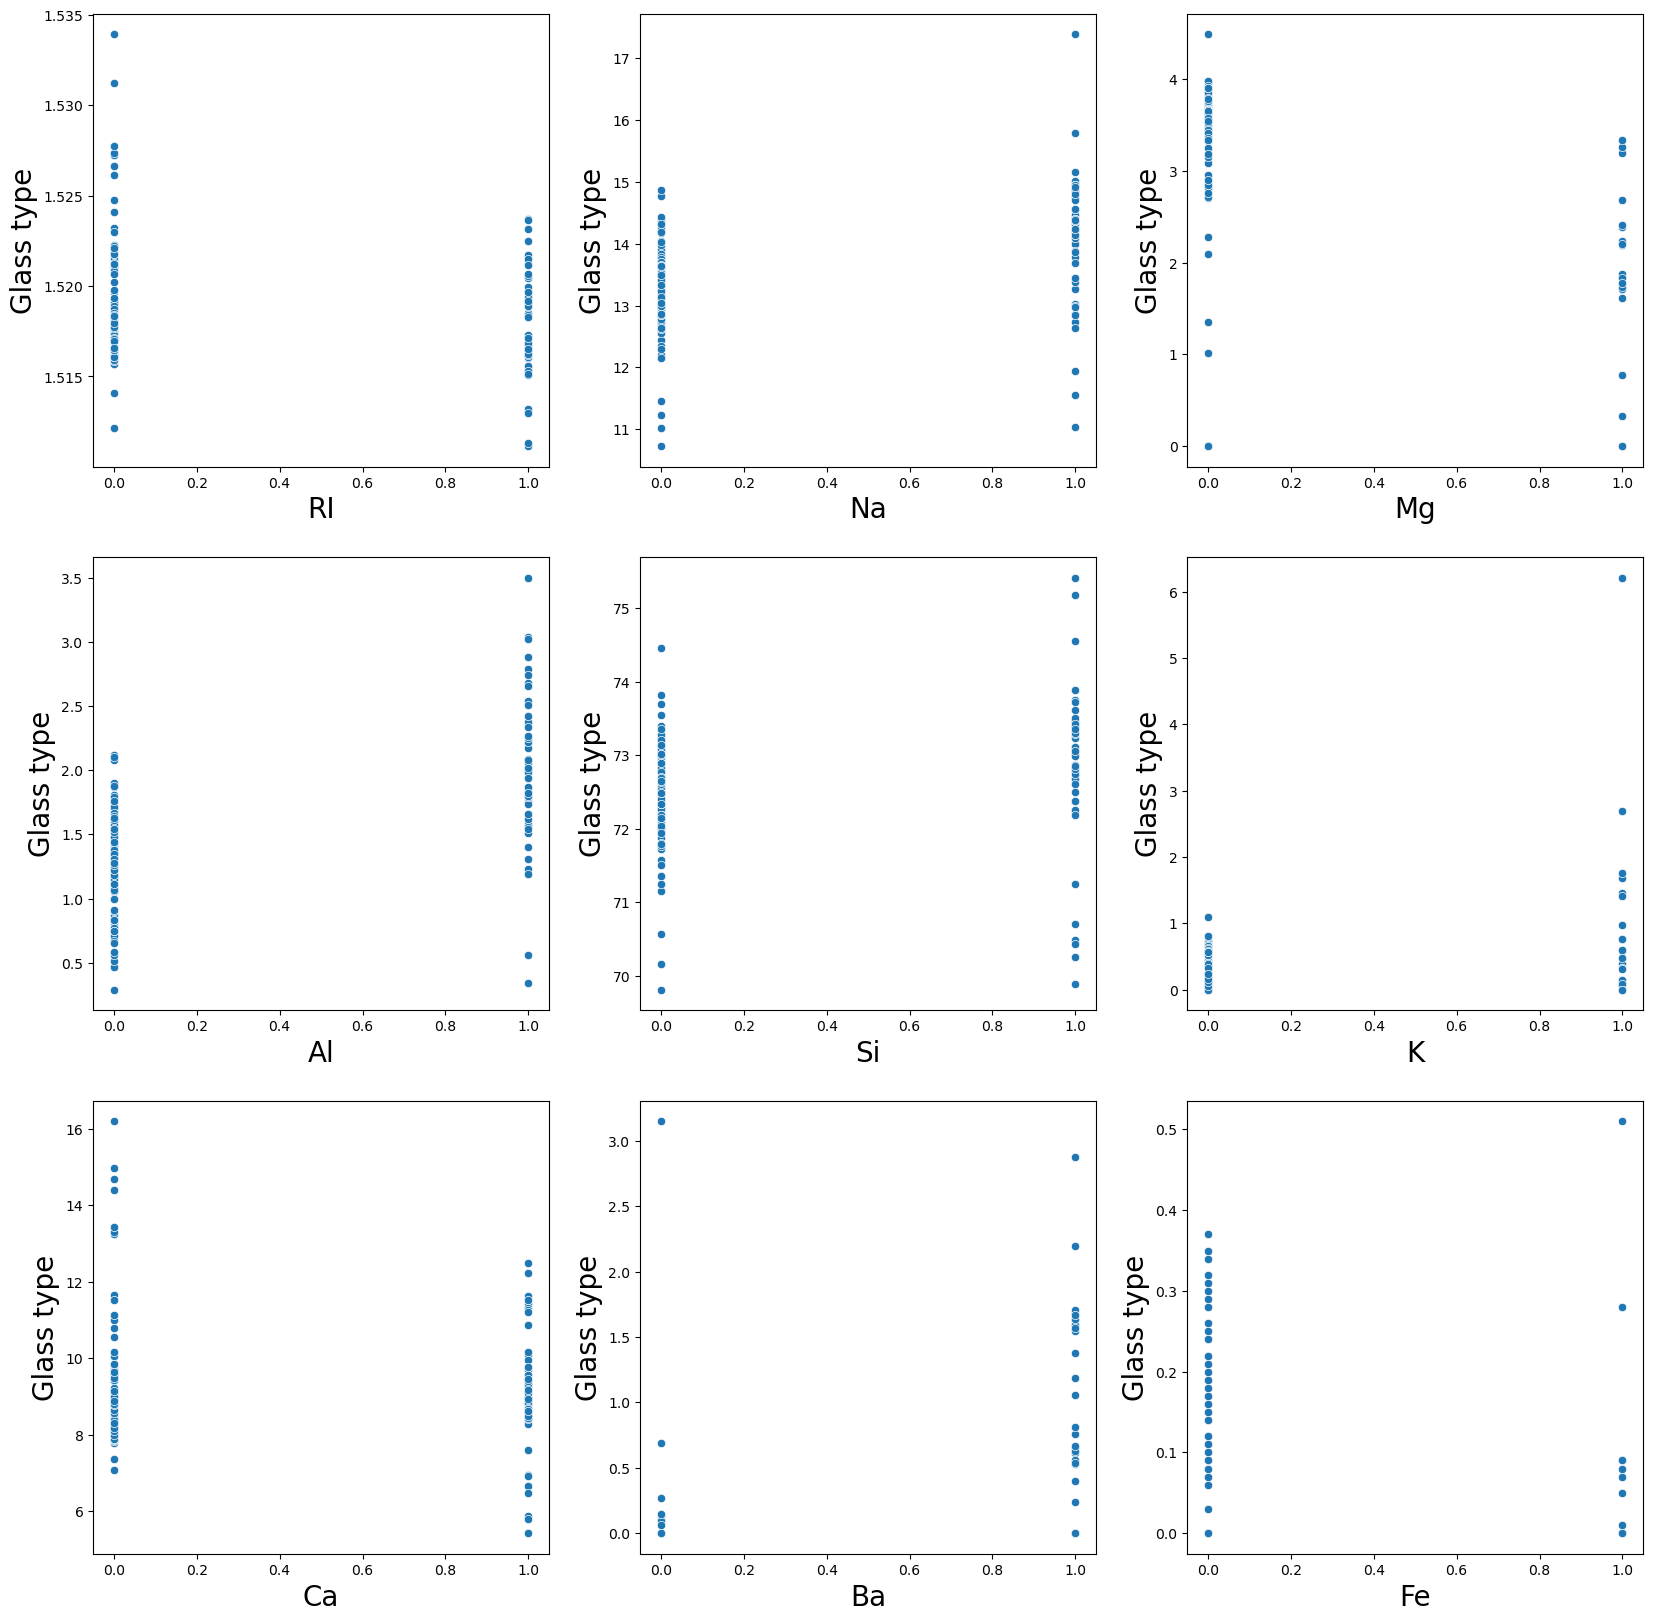

In [114]:
plt.figure(figsize =(20,20))
num = 1
for column in df.drop(['Glass type'], axis=1):
    if num <=9:
        ax = plt.subplot(3,3,num)
        sns.scatterplot(df['Glass type'],df[column])
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Glass type', fontsize=20)
    num +=1
plt.show()

We see that
1. For Ri the most of values lie between 1.515 to 1.525 for target 1 and for target value 0 there are values more upto 1.535.
2. For Na the values are between 11 to 15 for both 0 and 1 target values. And also we see there are values above 15 to the target 1.
3. For Mg the values for 0 are from 2.5 to 4 but for target 1 the values are scattered from 1.8 to 2.5.
4. For Al the values for 0 are from 0.5 to 1.8  and for 1 the values are from 1.2 to 3.
5. For Si the values for 0 are from 71 to 74 and for 1 the values are from 72.5 to 74.
6. For K the values for 0 are from 0 to 1 and for 1 the values are from 0 to 2.
7. For Ca the values for 0 are from 6.5 to 12 and for 1 the values are from 8 to 12.
8. For Ba the values for 0 are from 0  to 0.2 and for 1 the values are from 0 to 1.8.
9. For Fe the values for 0 are from 0 to 0.4 and for 1 the values are scattered and very few have fe content in glass.
10. And also we see from all the columns that there are more value for 0 compared to 1 from this also we can see that there is huge data imbalance. 

#### Next we will check for outliers

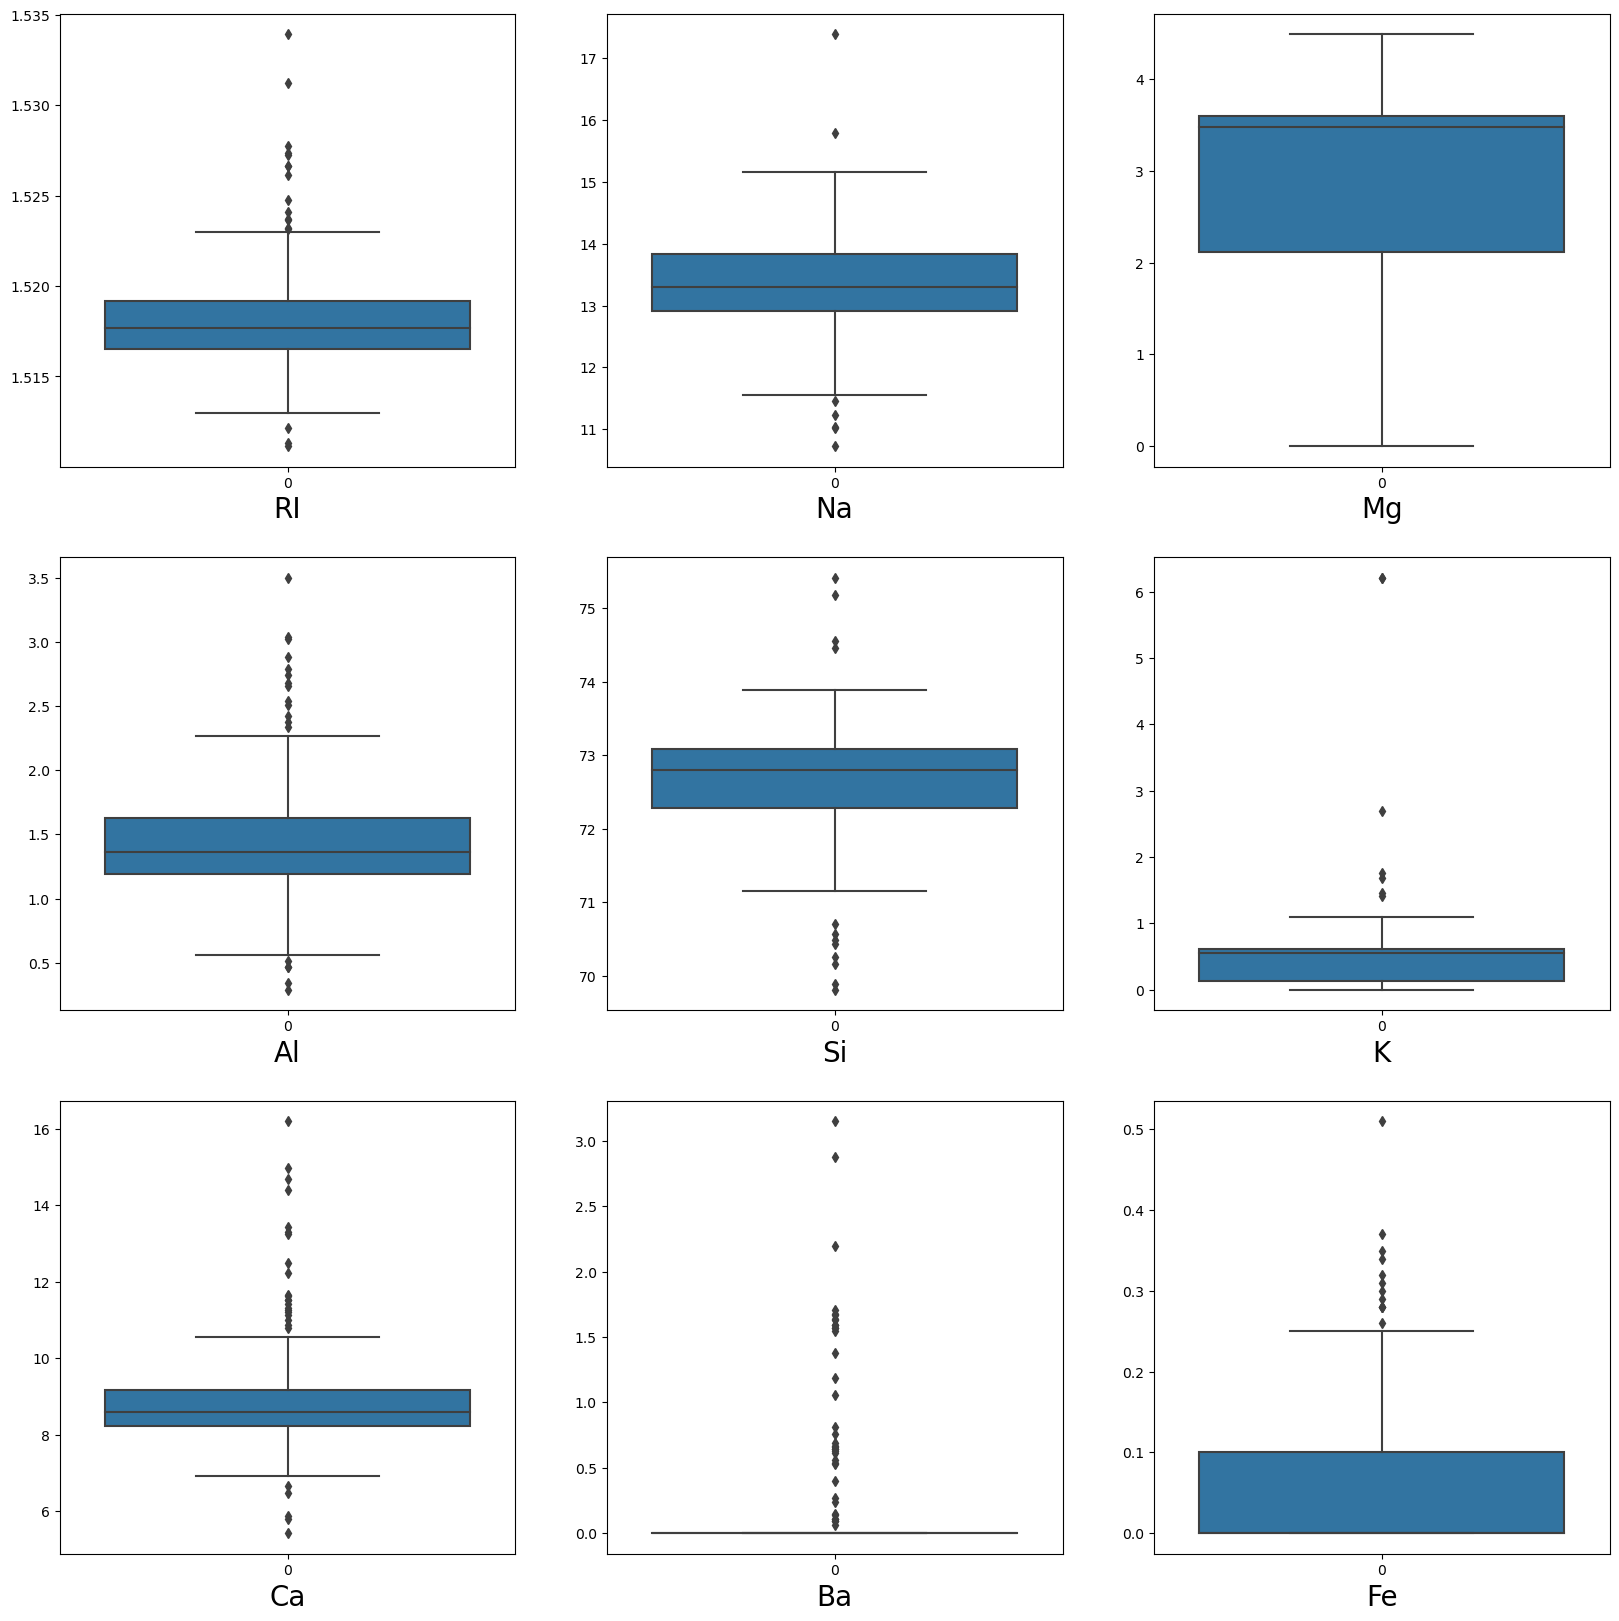

In [115]:
plt.figure(figsize =(20,20))
num = 1
for column in df.drop(['Glass type'], axis=1):
    if num <=9:
        ax = plt.subplot(3,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 20)
    num +=1
plt.show()

from the above box plot we see there are huge outliers in most of the columns both on upper and lower side except Mg, so we need to treat outliers.

In Ba, we see only outliers so its better to drop Ba feature.

In [116]:
df.drop(['Ba'], axis =1, inplace=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,1


In [117]:
#outlier removing using z_score
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3) #threshold = 3
z_df=df[(z<3).all(axis=1)]
z_df.shape

(198, 9)

In [118]:
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

data_loss =    7.476635514018691


In [119]:
#outlier removal using iqr_method
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]
iqr_df.shape

(138, 9)

In [120]:
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

data_loss =    35.51401869158878


We consider the z-score for removing the outliers as it has dataloss of 7.4%

In [121]:
z_df.reset_index()

,index,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0
...,...,...,...,...,...,...,...,...,...,...
193,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0,1
194,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,1
195,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,1
196,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,1


In [162]:
z_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass type
RI,1.000000,0.080871,0.046589,-0.517520,-0.624998,-0.342631,0.667278,-0.024093,-0.043226
Na,0.080871,1.000000,-0.508707,0.260969,-0.264833,-0.566086,-0.007721,-0.222933,0.500358
Mg,0.046589,-0.508707,1.000000,-0.603100,-0.354986,0.443271,-0.398098,0.150407,-0.848251
Al,-0.517520,0.260969,-0.603100,1.000000,0.335819,0.000584,-0.222855,-0.126173,0.604003
Si,-0.624998,-0.264833,-0.354986,0.335819,1.000000,0.065878,-0.158119,0.027832,0.243479
K,-0.342631,-0.566086,0.443271,0.000584,0.065878,1.000000,-0.506991,0.095030,-0.366447
Ca,0.667278,-0.007721,-0.398098,-0.222855,-0.158119,-0.506991,1.000000,-0.001364,0.241620
Fe,-0.024093,-0.222933,0.150407,-0.126173,0.027832,0.095030,-0.001364,1.000000,-0.222155
Glass type,-0.043226,0.500358,-0.848251,0.604003,0.243479,-0.366447,0.241620,-0.222155,1.000000


#### now Check for skewness

In [143]:
z_df.skew()

RI            0.964230
Na            0.464034
Mg           -1.424633
Al            0.620498
Si           -0.622500
K             0.430888
Ca            1.021982
Fe            1.517610
Glass type    1.346529
dtype: float64

In [144]:
x = z_df.drop(columns = ['Glass type'], axis = 1)
y = z_df['Glass type']

In [145]:
x

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0


In [146]:
y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Glass type, Length: 198, dtype: int64

In [149]:
# Ri, Al, Si, Ca has positive values and also no  zeros so we will try with box cox method
from scipy.stats import boxcox, yeojohnson


In [150]:
x['RI'] = boxcox(x['RI'])[0]

In [151]:
x['RI'].skew()

0

In [152]:
x['Al'] = boxcox(x['Al'])[0]
x['Al'].skew()

0.07418326843912532

In [153]:
x['Si'] = boxcox(x['Si'])[0]
x['Si'].skew()

0.05986685815410669

In [154]:
x['Ca'] = boxcox(x['Ca'])[0]
x['Ca'].skew()

-0.04768042768693633

In [155]:
x['Mg'] = yeojohnson(x['Mg'])[0]

In [156]:
x['Fe'] = yeojohnson(x['Fe'])[0]

In [157]:
x.skew()

RI    0.000000
Na    0.464034
Mg   -0.995529
Al    0.074183
Si    0.059867
K     0.430888
Ca   -0.047680
Fe    0.885891
dtype: float64

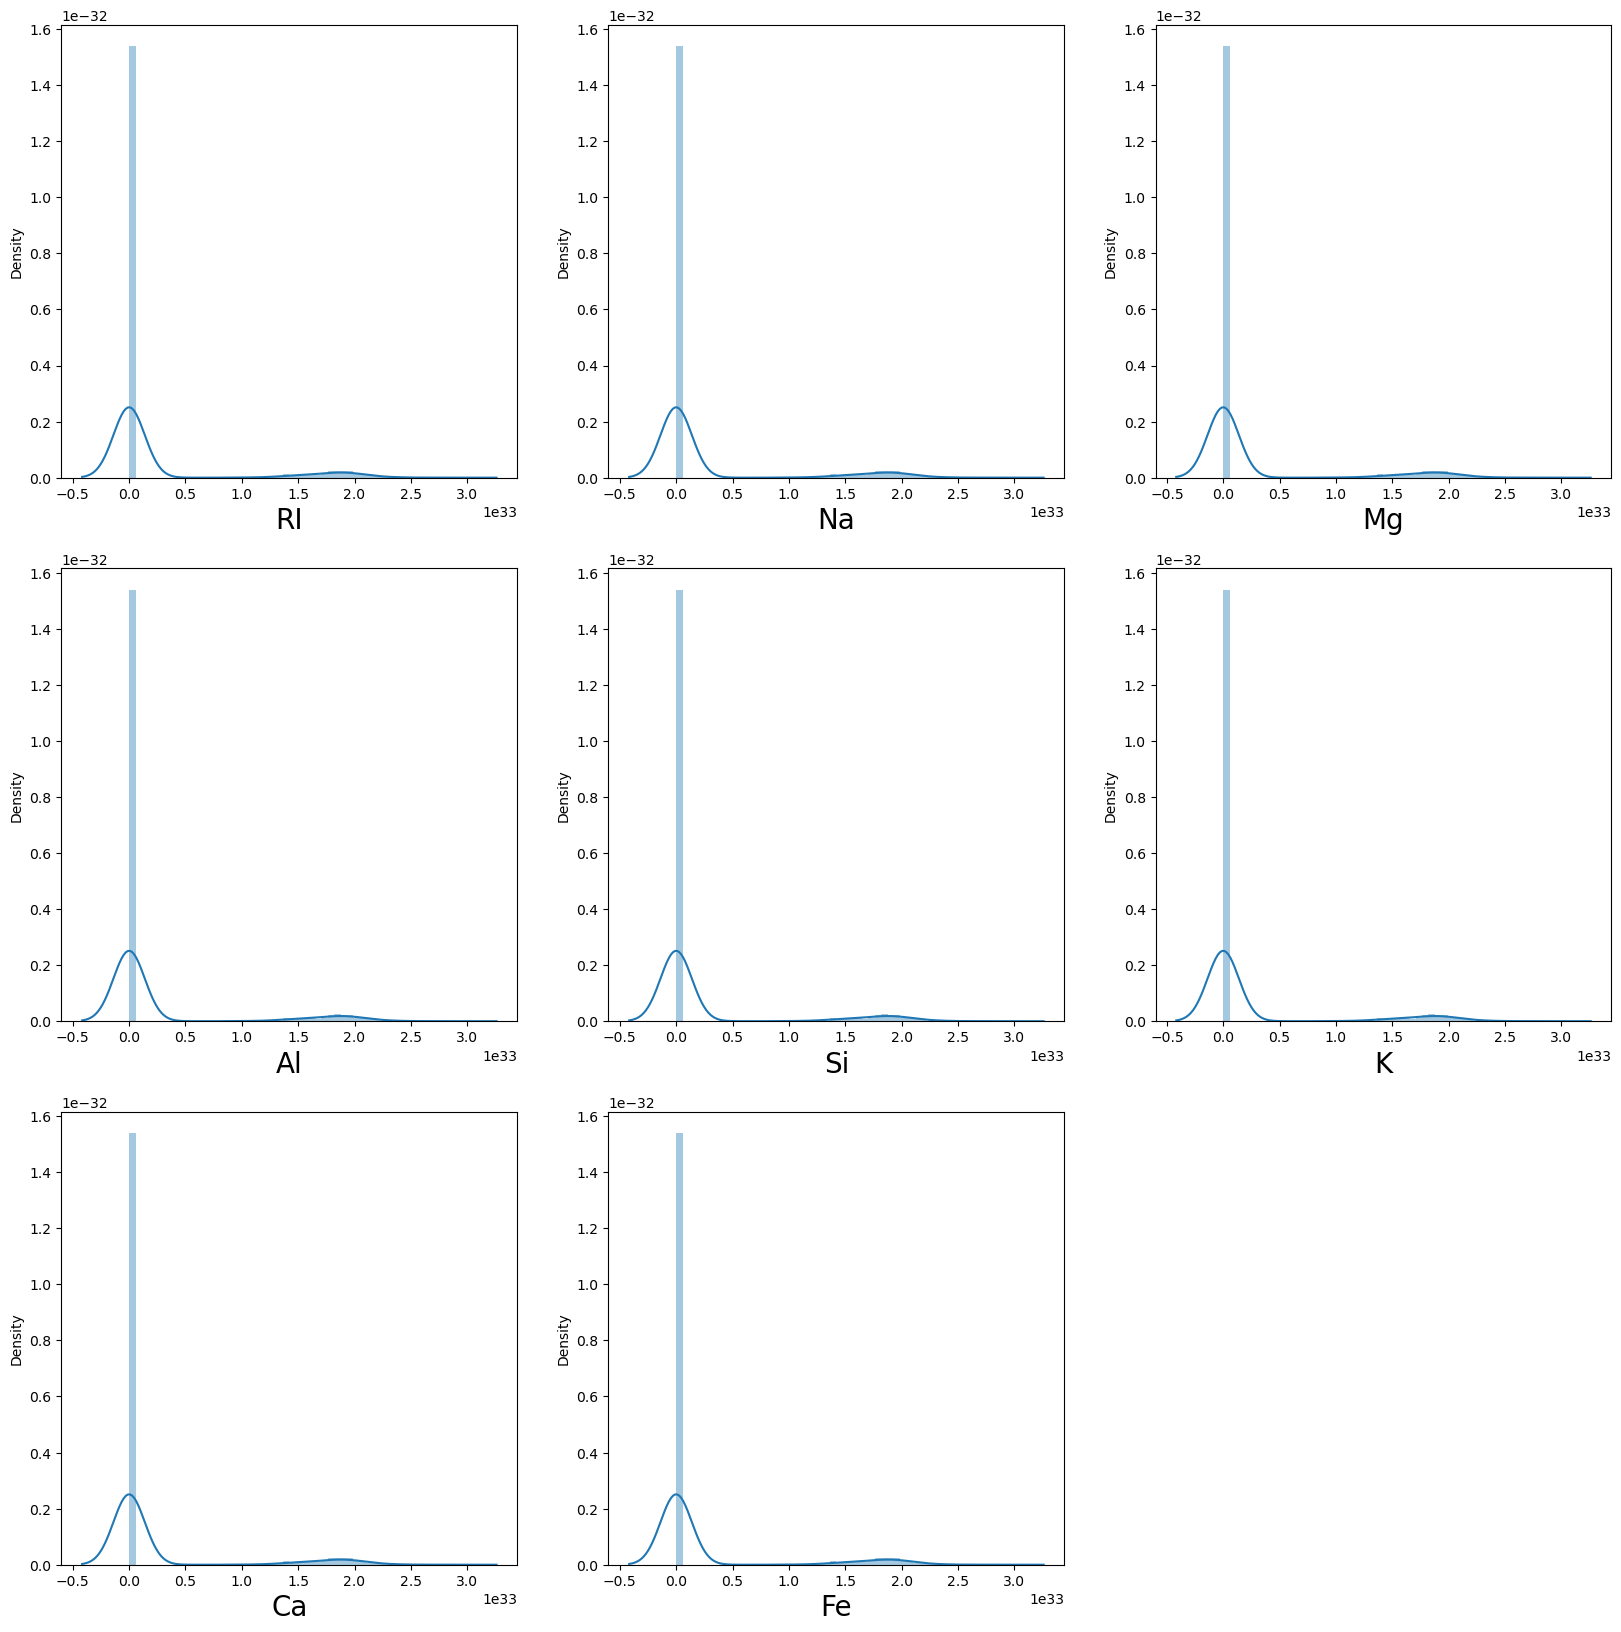

In [158]:
plt.figure(figsize =(20,20), facecolor = 'white')
num = 1
for column in x:
    if num <=9:
        ax = plt.subplot(3,3,num)
        sns.distplot(x)
        plt.xlabel(column,fontsize = 20)
        
    num +=1
plt.show()

We see that all the columns are normal and we have removed the skewness in all columns.

In [159]:
x.corr()

,RI,Na,Mg,Al,Si,K,Ca,Fe
RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,1.000000,-0.449644,0.210869,-0.230999,-0.566086,-0.015260,-0.173452
Mg,NaN,-0.449644,1.000000,-0.569686,-0.389560,0.392290,-0.369136,0.123097
Al,NaN,0.210869,-0.569686,1.000000,0.326929,0.052696,-0.264635,-0.092205
Si,NaN,-0.230999,-0.389560,0.326929,1.000000,0.032875,-0.120747,-0.008616
K,NaN,-0.566086,0.392290,0.052696,0.032875,1.000000,-0.561201,0.049287
Ca,NaN,-0.015260,-0.369136,-0.264635,-0.120747,-0.561201,1.000000,0.032869
Fe,NaN,-0.173452,0.123097,-0.092205,-0.008616,0.049287,0.032869,1.000000


In [161]:
z_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass type
RI,1.000000,0.080871,0.046589,-0.517520,-0.624998,-0.342631,0.667278,-0.024093,-0.043226
Na,0.080871,1.000000,-0.508707,0.260969,-0.264833,-0.566086,-0.007721,-0.222933,0.500358
Mg,0.046589,-0.508707,1.000000,-0.603100,-0.354986,0.443271,-0.398098,0.150407,-0.848251
Al,-0.517520,0.260969,-0.603100,1.000000,0.335819,0.000584,-0.222855,-0.126173,0.604003
Si,-0.624998,-0.264833,-0.354986,0.335819,1.000000,0.065878,-0.158119,0.027832,0.243479
K,-0.342631,-0.566086,0.443271,0.000584,0.065878,1.000000,-0.506991,0.095030,-0.366447
Ca,0.667278,-0.007721,-0.398098,-0.222855,-0.158119,-0.506991,1.000000,-0.001364,0.241620
Fe,-0.024093,-0.222933,0.150407,-0.126173,0.027832,0.095030,-0.001364,1.000000,-0.222155
Glass type,-0.043226,0.500358,-0.848251,0.604003,0.243479,-0.366447,0.241620,-0.222155,1.000000


#### Scale the data

In [163]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
X_sr = pd.DataFrame(sr.fit_transform(x), columns = x.columns)
X_sr

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,-3.469447e-18,0.279411,2.170505,-0.719250,-1.494168,-1.278321,0.013708,-0.668397
1,-3.469447e-18,0.637537,0.609144,-0.099942,-0.047116,0.166828,-1.022499,-0.668397
2,-3.469447e-18,0.121835,0.535033,0.302662,0.410418,-0.142847,-1.083443,-0.668397
3,-3.469447e-18,-0.336566,0.746051,-0.261900,-0.248806,0.476503,-0.564334,-0.668397
4,-3.469447e-18,-0.250616,0.639177,-0.379629,0.575581,0.407686,-0.737044,-0.668397
...,...,...,...,...,...,...,...,...
193,-3.469447e-18,0.995663,-1.891804,2.878254,-0.248806,-1.209504,0.449332,-0.668397
194,-3.469447e-18,2.113017,-1.891804,1.238008,0.538569,-1.484770,-0.362562,-0.668397
195,-3.469447e-18,1.310814,-1.891804,1.297342,1.232708,-1.484770,-0.318507,-0.668397
196,-3.469447e-18,1.339464,-1.891804,1.138359,1.623874,-1.484770,-0.274731,-0.668397


#### Check for Multicollinearity

In [164]:
# Now we will check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X_sr.values, i) for i in range(len(X_sr.columns))]
vif['Features'] = X_sr.columns

vif

,VIF Values,Features
0,1.000000,RI
1,7.599834,Na
2,9.683476,Mg
3,3.269590,Al
4,3.762646,Si
5,4.909894,K
6,8.206149,Ca
7,1.040191,Fe


We see that all the values are below 10 so, there is no multicollinearity among the features. So, next we will build the model first we will split the dataset into train and test datsets. then build the model.

Since we have imbalanced dataset, we will balance the data using Smote method.

In [174]:
y.value_counts()

0    154
1     44
Name: Glass type, dtype: int64

#### SMOTE

In [168]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm ,y_sm = sm.fit_resample(X_sr, y)

In [173]:
y_sm.value_counts()

0    154
1    154
Name: Glass type, dtype: int64

So, now we have the balanced Dataset. Next we will split the dataset into train and test data, then we will build a model.

#### Train_test_split

In [175]:
#import necessary libararies
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC

In [181]:
accuracy = 0
r_state = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred = log.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>accuracy:
        accuracy = acc
        r_state = i
print("max accuracy score : ", accuracy,"at the random state: " , r_state)

max accuracy score :  1.0 at the random state:  8


In [183]:
x_train,x_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = r_state)

In [184]:
x_train.shape

(215, 8)

In [185]:
x_test.shape

(93, 8)

In [187]:
y_train.value_counts()

1    110
0    105
Name: Glass type, dtype: int64

In [188]:
y_test.value_counts()

0    49
1    44
Name: Glass type, dtype: int64

In [186]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_pred_train = log.predict(x_train)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,log_pred))
print('\n Test Classification Report \n', classification_report(y_test,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_train = rfc.predict(x_train)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
bc_pred_train = bc.predict(x_train)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_pred_train = abc.predict(x_train)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_pred_train = gbc.predict(x_train)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_pred_train = etc.predict(x_train)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_pred_train = dtc.predict(x_train)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test,dtc_pred))
print("****************************************")
print("\n")

knn = KNN()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_pred_train = knn.predict(x_train)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_pred_train = svc.predict(x_train)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test, svc_pred))
print("****************************************")
print("\n")

Logistic Regression
Accuracy of train data is   96.27906976744185 %
Accuracy of test data is   100.0 %

 Confusion Matrix [[49  0]
 [ 0 44]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

****************************************


Random Forest Classifier
Accuracy of train data is   100.0 %
Accuracy of test data is   100.0 %

 Confusion Matrix [[49  0]
 [ 0 44]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.

In [189]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy


,Models,Accuracy_score
0,Logistic,1.000000
1,RandomForest Classifier,1.000000
2,Bagging Classifier,1.000000
3,AdaBoost Classifier,0.989247
4,GradientBoosting,0.989247
5,ExtraTreesClassifier,1.000000
6,DecisionTree,0.989247
7,Knn,1.000000
8,svc,1.000000


We see that 
1. Random Forest CLassifier, Bagging Classifier and Extra Trees Classifier are giving 100% result on both Train data and test data. But this is impossible when we have difference in datasets.
2. Ada Boost Classifier, Gradient Boosting Classifier, Decision Tree Classifier are having 100% in Train data and 98% acuuracy in test data, this may happen because there is 70% of data for training and 30% data for testing.
3. Logistic regression, KNN, Svc are having 97% accuracy in train data and 100% in test data, which is not possible because when the training itself is not done 100% accurately then test wont be 100% accuracy.

So considering Adaboost, Gradient boost and Decision trees as the best with the accuracy we will go for further procedure.

So, Next we will check with the Cross validation score 

In [190]:
print('\n Logistic Regression \n')
log_score = cross_val_score(log, X_sr, y, cv=8)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")
 
print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, X_sr, y, cv=8)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")

print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, X_sr, y, cv=8)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")

print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, X_sr, y, cv=8)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, X_sr, y, cv=8)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")

print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, X_sr, y, cv=8)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, X_sr, y, cv=8)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, X_sr, y, cv=8)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, X_sr, y, cv=8)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")



 Logistic Regression 

[0.88       0.96       0.96       0.8        0.96       0.92
 0.91666667 1.        ]
0.9245833333333333
0.07541666666666669
 

 Random Forest Classifier 

[1.         0.92       0.96       0.8        0.96       0.92
 0.83333333 1.        ]
0.9241666666666666
0.07583333333333342
 

 Bagging Classifier 

[1.         0.92       0.92       0.8        0.88       0.84
 0.83333333 0.95833333]
0.8939583333333334
0.10604166666666659
 

 AdaBoost Classifier 

[0.8        0.92       0.96       0.8        0.96       0.88
 0.83333333 1.        ]
0.8941666666666668
0.09508064516129022
 

 Gradient Boosting Classifier 

[1.         0.92       0.96       0.8        0.96       0.92
 0.83333333 1.        ]
0.9241666666666666
0.06508064516129042
 

 ExtraTrees Classifier 

[0.88       0.92       0.96       0.8        0.96       0.92
 0.95833333 1.        ]
0.9247916666666667
0.07520833333333332
 

 DecisionTree Classifier 

[1.         0.92       0.92       0.8        0.96       0

In [191]:
CV_score = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'CV_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_score

,Models,CV_score
0,Logistic,0.075417
1,RandomForest Classifier,0.075833
2,Bagging Classifier,0.106042
3,AdaBoost Classifier,0.095081
4,GradientBoosting,0.065081
5,ExtraTreesClassifier,0.075208
6,DecisionTree,0.075289
7,Knn,0.070417
8,svc,0.080417


Considering for <b>AdaBoost, GradientBoost and Decision Tree</b>  we are getting cross-validation score of 0.09, 0.06,0.07 respectively.

So here we see there is least difference between accuracy and cv score in <b>Gradient Boosting classifer i.e., 0.06,</b> so we will tune the parameters so that we can increase the model performance. 

#### Hyper-Parameter Tuning

In [194]:
param_grid = {"learning_rate":[0.1,0.02,0.01,0.05],"n_estimators":[10,20,30,40,50], 
              "criterion": ['friedman_mse','squared_error'], "min_samples_split": [10,15,20],
              "max_depth":[4,6,8],"random_state": [10,40,75]}

In [195]:
gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=8)
gbc.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.02, 0.01, 0.05],
                         'max_depth': [4, 6, 8],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [10, 20, 30, 40, 50],
                         'random_state': [10, 40, 75]})

In [196]:
best_parameters=gbc.best_params_
print(best_parameters)
best_result=gbc.best_score_
print(best_result*100)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 40, 'random_state': 40}
93.46509971509971


In [199]:
glass1 = GradientBoostingClassifier(criterion = 'friedman_mse',learning_rate=0.1, max_depth=4, min_samples_split=20, n_estimators=40, random_state=40)

In [200]:
glass1.fit(x_train,y_train)
glass1_pred = glass1.predict(x_test)
gbc_glass_accu = accuracy_score(y_test,glass1_pred) * 100
print(f"Accuracy Score of test data is: ",gbc_glass_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test,glass1_pred))
print('\n Test Classification Report \n', classification_report(y_test,glass1_pred))

Accuracy Score of test data is:  100.0 %

 Confusion Matrix [[49  0]
 [ 0 44]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        44

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



### Here the best parameters for this glass prediction problem are {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 40, 'random_state': 40} and model score has increased to 100% after tuning the parameters, earlier it was 98.9%. so we consider the above parameters and also Gradient Boosting Classifier as best model.

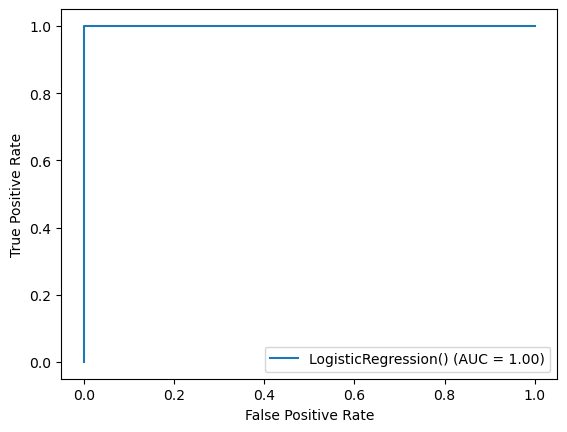

In [205]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,log_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=log)
display.plot()

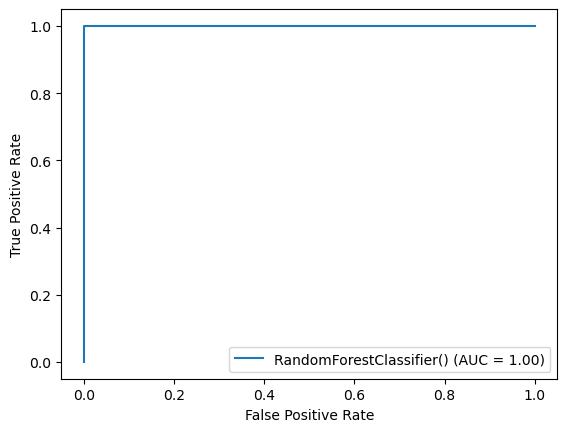

In [206]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,rfc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=rfc)
display.plot()

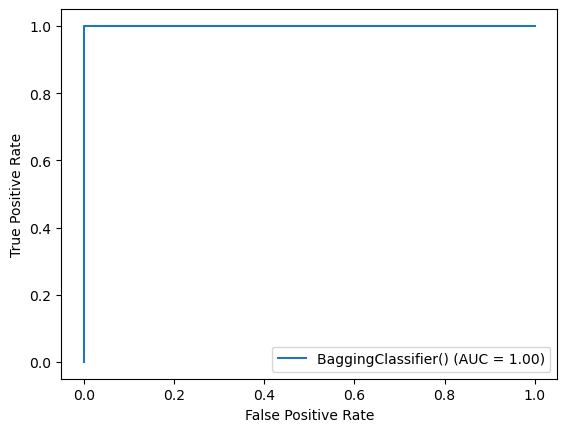

In [207]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,bc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=bc)
display.plot()

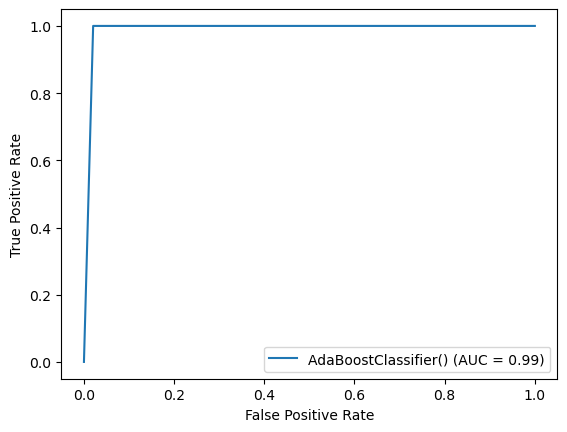

In [208]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,abc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=abc)
display.plot()

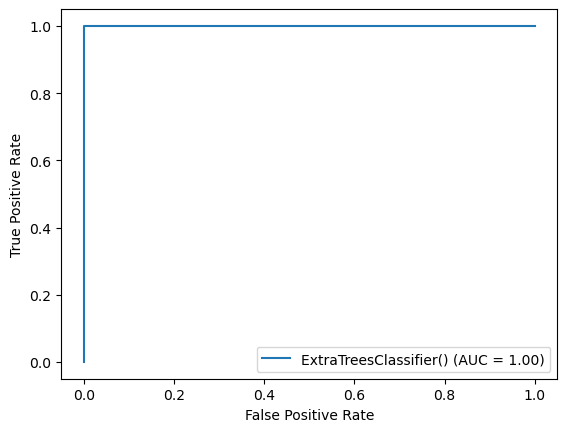

In [209]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,etc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=etc)
display.plot()

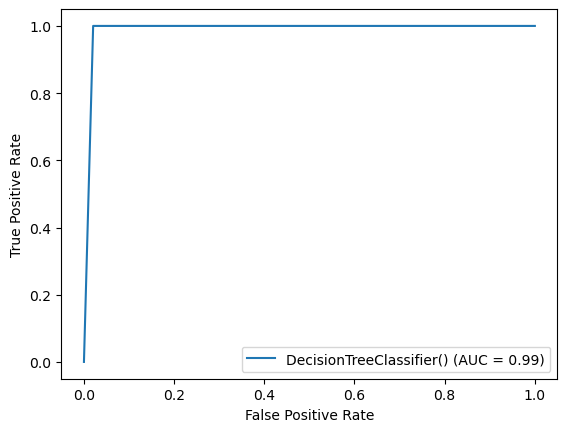

In [210]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,dtc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=dtc)
display.plot()

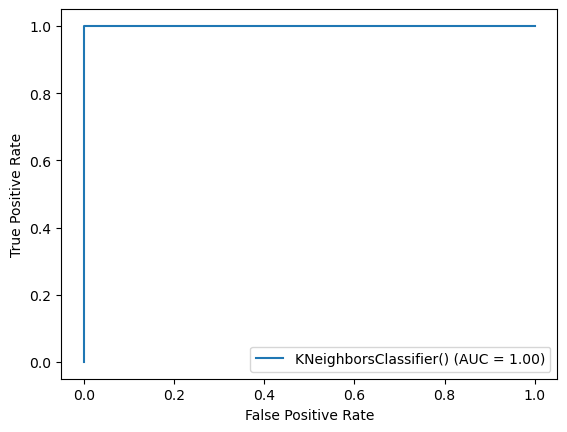

In [211]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=knn)
display.plot()

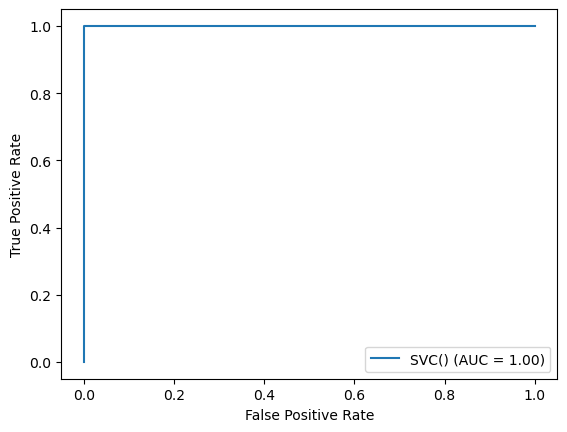

In [212]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,svc_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=svc)
display.plot()

#### AUC Curve For our Final Model

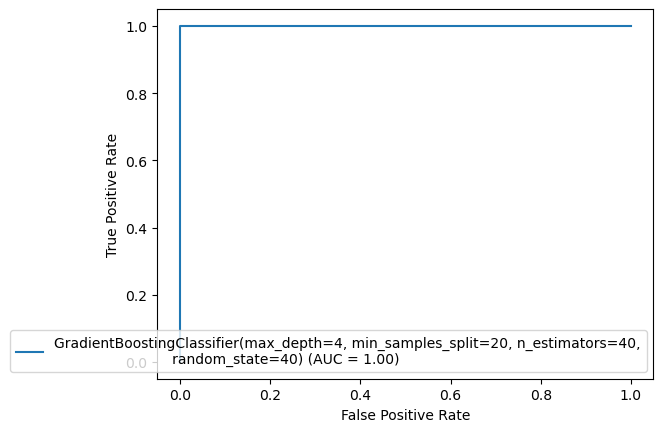

In [213]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,glass1_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc=roc_auc,estimator_name=glass1)
display.plot()

#### Save the Model

In [214]:
import joblib
joblib.dump(glass1, "glass_prediction.pkl")

['glass_prediction.pkl']

In [215]:
Glass = joblib.load("glass_prediction.pkl")
result = Glass.score(x_test,y_test)
print(result)

1.0


In [216]:
#create dataframe comparing 
prediction = pd.DataFrame([Glass.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
prediction

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
Predicted,0,1,1,0,1,0,0,1,0,0,...,1,1,1,0,1,0,1,1,0,0
Actual,0,1,1,0,1,0,0,1,0,0,...,1,1,1,0,1,0,1,1,0,0


### We see almost same values in the dataframe i.e., Predicted and actual values are same, So we consider Gradient Boosting Classifier as the best model.